In [1]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D,Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [3]:
TRAIN_DIRECTORY = "images/train"
TEST_DIRECTORY = "images/validation"

In [5]:
def createDataFrame(dir):
    image_paths=[]
    labels=[]
    for label in os.listdir(dir):
        for imageName in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imageName))
            labels.append(label)
        print(label,"completed")
    return image_paths,labels

In [7]:
train = pd.DataFrame()
train['image'],train['label']=createDataFrame(TRAIN_DIRECTORY)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [9]:
print(train)

                                image     label
0            images/train\angry\0.jpg     angry
1            images/train\angry\1.jpg     angry
2           images/train\angry\10.jpg     angry
3        images/train\angry\10002.jpg     angry
4        images/train\angry\10016.jpg     angry
...                               ...       ...
28816  images/train\surprise\9969.jpg  surprise
28817  images/train\surprise\9985.jpg  surprise
28818  images/train\surprise\9990.jpg  surprise
28819  images/train\surprise\9992.jpg  surprise
28820  images/train\surprise\9996.jpg  surprise

[28821 rows x 2 columns]


In [11]:
test = pd.DataFrame()
test['image'],test['label']=createDataFrame(TEST_DIRECTORY)

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed


In [13]:
print(test)

                                    image     label
0       images/validation\angry\10052.jpg     angry
1       images/validation\angry\10065.jpg     angry
2       images/validation\angry\10079.jpg     angry
3       images/validation\angry\10095.jpg     angry
4       images/validation\angry\10121.jpg     angry
...                                   ...       ...
7061  images/validation\surprise\9806.jpg  surprise
7062  images/validation\surprise\9830.jpg  surprise
7063  images/validation\surprise\9853.jpg  surprise
7064  images/validation\surprise\9878.jpg  surprise
7065   images/validation\surprise\993.jpg  surprise

[7066 rows x 2 columns]


In [15]:
from tqdm.notebook import tqdm

In [17]:
def extract_features(images):
    features=[]
    for image in tqdm(images):
        img=load_img(image,color_mode="grayscale")
        img=np.array(img)
        features.append(img)
    features=np.array(features)
    features=features.reshape(len(features),48,48,1)
    return features

In [19]:
train_features=extract_features(train['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

In [21]:
test_features=extract_features(test['image'])

  0%|          | 0/7066 [00:00<?, ?it/s]

In [23]:
x_train=train_features/255.0
x_test=test_features/255.0

In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [29]:
y_train=le.transform(train['label'])
y_test=le.transform(test['label'])

In [31]:
y_train=to_categorical(y_train,num_classes=7)
y_test=to_categorical(y_test,num_classes=7)

In [45]:
import keras
model=Sequential()
# Define the input layer
input_layer = keras.Input(shape=(48, 48, 1))

# Create the Sequential model with the input layer
model = keras.Sequential([input_layer])

#convolutional layers
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,4))

model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,4))

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,4))

model.add(Conv2D(512,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0,4))

model.add(Flatten())

#fully connected layers
model.add(Dense(512,activation='relu'))
model.add(Dropout(0,4))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0,3))

#output layer
model.add(Dense(7,activation='softmax'))

In [49]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [51]:
model.fit(x=x_train,y=y_train,batch_size=128,epochs=100,validation_data=(x_test,y_test))

Epoch 1/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 166s 721ms/step - accuracy: 0.2341 - loss: 1.8371 - val_accuracy: 0.2683 - val_loss: 1.7590
Epoch 2/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 199s 884ms/step - accuracy: 0.3124 - loss: 1.6844 - val_accuracy: 0.4421 - val_loss: 1.4437
Epoch 3/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 228s 1s/step - accuracy: 0.4656 - loss: 1.3837 - val_accuracy: 0.4953 - val_loss: 1.3017
Epoch 4/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 221s 976ms/step - accuracy: 0.5375 - loss: 1.2137 - val_accuracy: 0.5371 - val_loss: 1.2172
Epoch 5/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 234s 1s/step - accuracy: 0.5754 - loss: 1.1155 - val_accuracy: 0.5517 - val_loss: 1.2047
Epoch 6/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 232s 1s/step - accuracy: 0.6207 - loss: 1.0039 - val_accuracy: 0.5664 - val_loss: 1.1476
Epoch 7/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 226s 1s/step - accuracy: 0.6578 - loss: 0.9123 - val_accuracy: 0.5802 - val_loss: 1.1610
Epoch 8/100
226/226 ━━━━━━━━━━━━━━━━━━━━ 229s 1s/step - accuracy: 0.7110 - loss: 

KeyboardInterrupt: 

In [53]:
model_json=model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")

In [55]:
from keras.models import model_from_json

In [57]:
json_file=open("emotiondetector.json","r")
model_json=json_file.read()
json_file.close()
model=model_from_json(model_json)
model.load_weights("emotiondetector.h5")

In [59]:
label=['angry','disgust','fear','happy','neutral','sad','surprise']

In [73]:
from keras.preprocessing.image import load_img, img_to_array
import numpy as np

def ef(image):
    img = load_img(image, color_mode="grayscale")
    feature = img_to_array(img)
    feature = feature.reshape(1, 48, 48, 1)
    return feature / 255.0

In [75]:
print("original image is of angry")
img = ef('images/train/angry/1.jpg')
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is: ", pred_label)

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 135ms/step
model prediction is:  angry


In [79]:
import matplotlib.pyplot as plt
%matplotlib inline

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is:  angry


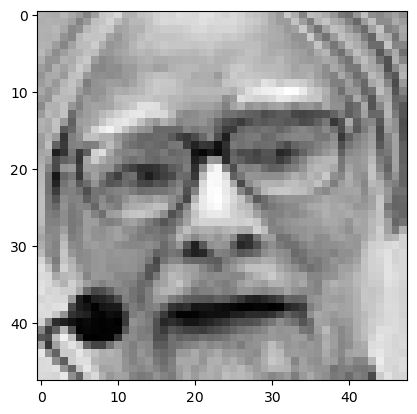

In [83]:
print("original image is of angry")
img = ef('images/train/angry/1.jpg')
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is: ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
model prediction is:  happy


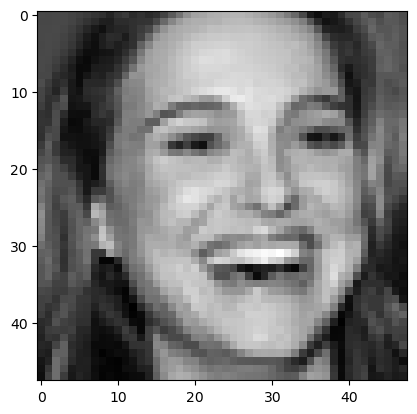

In [91]:
print("original image is of angry")
img = ef('images/train/happy/1237.jpg')
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is: ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')

original image is of angry
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step
model prediction is:  angry


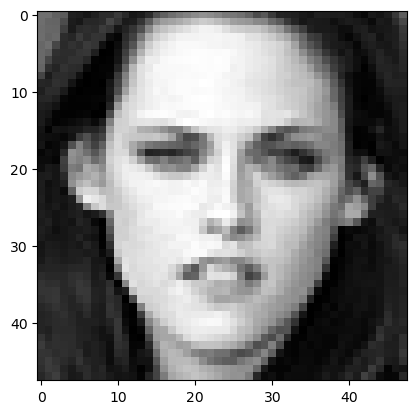

In [97]:
print("original image is of angry")
img = ef('images/train/angry/469.jpg')
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is: ", pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')